# Credit EDA Case Study

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading dataset from local

df = pd.read_csv("application_data.csv")

In [4]:
# Determining the shape of the datset
df.shape

(307511, 122)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
#Cleaning the missing data-
null_data = df.isnull().sum()/len(df)*100

In [8]:
null_data.sort_values(ascending = False)

COMMONAREA_MEDI                69.872297
COMMONAREA_AVG                 69.872297
COMMONAREA_MODE                69.872297
NONLIVINGAPARTMENTS_MODE       69.432963
NONLIVINGAPARTMENTS_MEDI       69.432963
NONLIVINGAPARTMENTS_AVG        69.432963
FONDKAPREMONT_MODE             68.386172
LIVINGAPARTMENTS_MEDI          68.354953
LIVINGAPARTMENTS_MODE          68.354953
LIVINGAPARTMENTS_AVG           68.354953
FLOORSMIN_MEDI                 67.848630
FLOORSMIN_MODE                 67.848630
FLOORSMIN_AVG                  67.848630
YEARS_BUILD_MEDI               66.497784
YEARS_BUILD_AVG                66.497784
YEARS_BUILD_MODE               66.497784
OWN_CAR_AGE                    65.990810
LANDAREA_MODE                  59.376738
LANDAREA_AVG                   59.376738
LANDAREA_MEDI                  59.376738
BASEMENTAREA_MEDI              58.515956
BASEMENTAREA_AVG               58.515956
BASEMENTAREA_MODE              58.515956
EXT_SOURCE_1                   56.381073
NONLIVINGAREA_ME

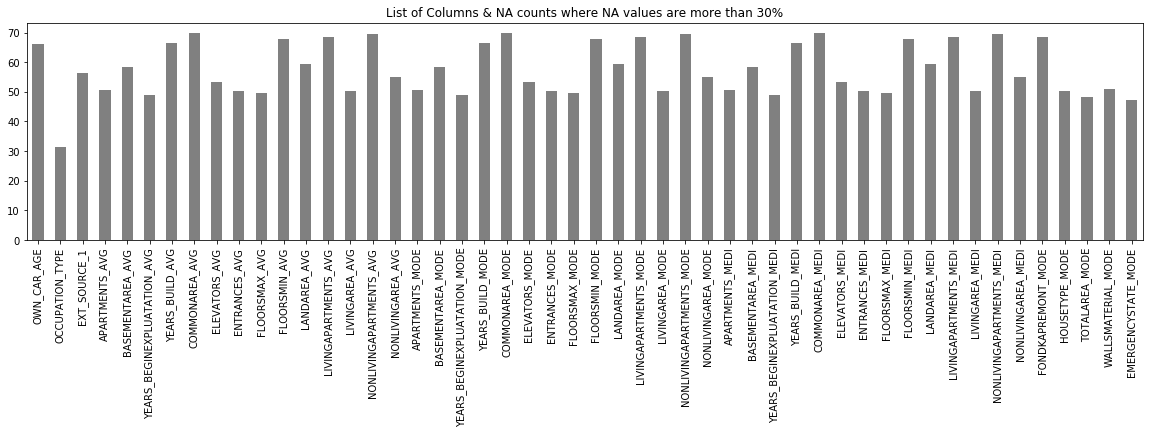

In [9]:
rem_cols = null_data[null_data.values >(30)]
plt.figure(figsize=(20,4))
rem_cols.plot(kind='bar', color="grey")
plt.title('List of Columns & NA counts where NA values are more than 30%')
plt.show()

In [10]:
len(rem_cols)

50

In [11]:
columnames = list(rem_cols.index)
df.drop(labels = columnames,axis =1,inplace=True)  


In [12]:
df.shape

(307511, 72)

In [13]:
df.isnull().sum().sort_values(ascending = False)

EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
NAME_TYPE_SUITE                 1292
DEF_60_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_30_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
FLAG_MOBIL                         0
DAYS_ID_PUBLISH                    0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
FLAG_EMP_PHONE                     0
REGION_POPULATION_RELATIVE         0
DAYS_REGISTRATION                  0
AMT_INCOME_TOTAL                   0
T

There are 50 columns having null values > 30% in the dataset

As we can see from above, that 'AMT-ANNUITY' is having null value rows. Since this column cannot be null in any case therefore we will fill those values with median after analysing it's statistics.

In [14]:
df['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

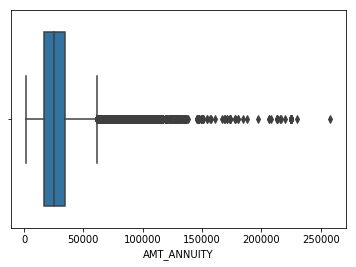

In [15]:
sns.boxplot(x=df["AMT_ANNUITY"])
plt.show()

#### As above boxplot seems okay, so we will not perform any cleansing activity other than filling the missing value with `median` 

In [16]:
#Filling missing values with median
value = df['AMT_ANNUITY'].median()
df.loc[df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=value

In [17]:
#Searching for the null value columns
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
C

In [18]:
# Removing rows having null values greater than or equal to 30%
emptyrow = df.isnull().sum(axis=1)
emptyrow = list(emptyrow[emptyrow.values>=0.3*len(df)].index)
df.drop(labels = emptyrow, axis=0,inplace=True)
print(len(emptyrow))


0


In [19]:
#Removing unwanted columns from this dataset

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels=unwanted,axis=1,inplace=True)

##### There are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.

In [20]:
#finding categorical columns having XNA values----
####### For Gender column #######

df[df['CODE_GENDER']=='XNA'].shape

(4, 42)

In [21]:
####### For Organization column #######

df[df['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 42)

We can see that there are 4 rows from Gender column and 55374 rows from Organization type column which has XNA values

In [22]:
# Describing gender column to find number of Males and Females

df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

#### Has we can see that Females are in majority and the XNA values are too less ie only 4, we can update those columns with Gender `F` , as this will not have any impact on the dataset.

In [23]:
# Updating the column 'CODE_GENDER' with 'F' 

df.loc[df['CODE_GENDER'] == 'XNA','CODE_GENDER'] = 'F'
df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [24]:
#Describing the organization type column
df['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

###### As we can see total count 307511 out of which 55374 rows are 'XNA' value, ie  18% thus we will not drop it, becuase deletion of 18% rows may impact on other variables statistics,therfore we will `exclude` it for the column in this value is occuring.

In [25]:
# Casting all variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

df[numeric_columns]=df[numeric_columns].apply(pd.to_numeric)
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Derived Metrics

##### Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [26]:
# Creating bins for Income

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [27]:
# Creating bins for Credit 

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=slots)

In [28]:

# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0_df=df.loc[df["TARGET"]==0]
target1_df=df.loc[df["TARGET"]==1]

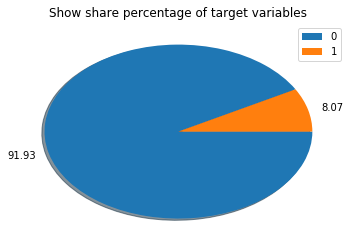

In [29]:

# Calculating Imbalance percentage----Since the majority is target0 and minority is target1
pi=df["TARGET"].value_counts(normalize=True).mul(100)
values= list(pi.values.round(2))
labels= list(pi.index)
plt.pie(values, labels= values,counterclock=False, shadow=True)
plt.title('Show share percentage of target variables')
plt.legend(labels)
plt.show()

### UNIVARIATE Analysis (Categories)
#### Client with `No Payment Difficulties` ----(Target - 0)

In [30]:
target0_df.shape

(282686, 44)

In [31]:
# Count Plotting
def uniplot(df,col,title,hue =None, c_pallate=None,hue_ord=None):
    
    sns.set_style('darkgrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 22
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 34
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    if(c_pallate==None):
        c_pallate="deep"

    ax = sns.countplot(data = df, x= col,hue = hue,hue_order=hue_ord,palette=c_pallate) 
    plt.show()   

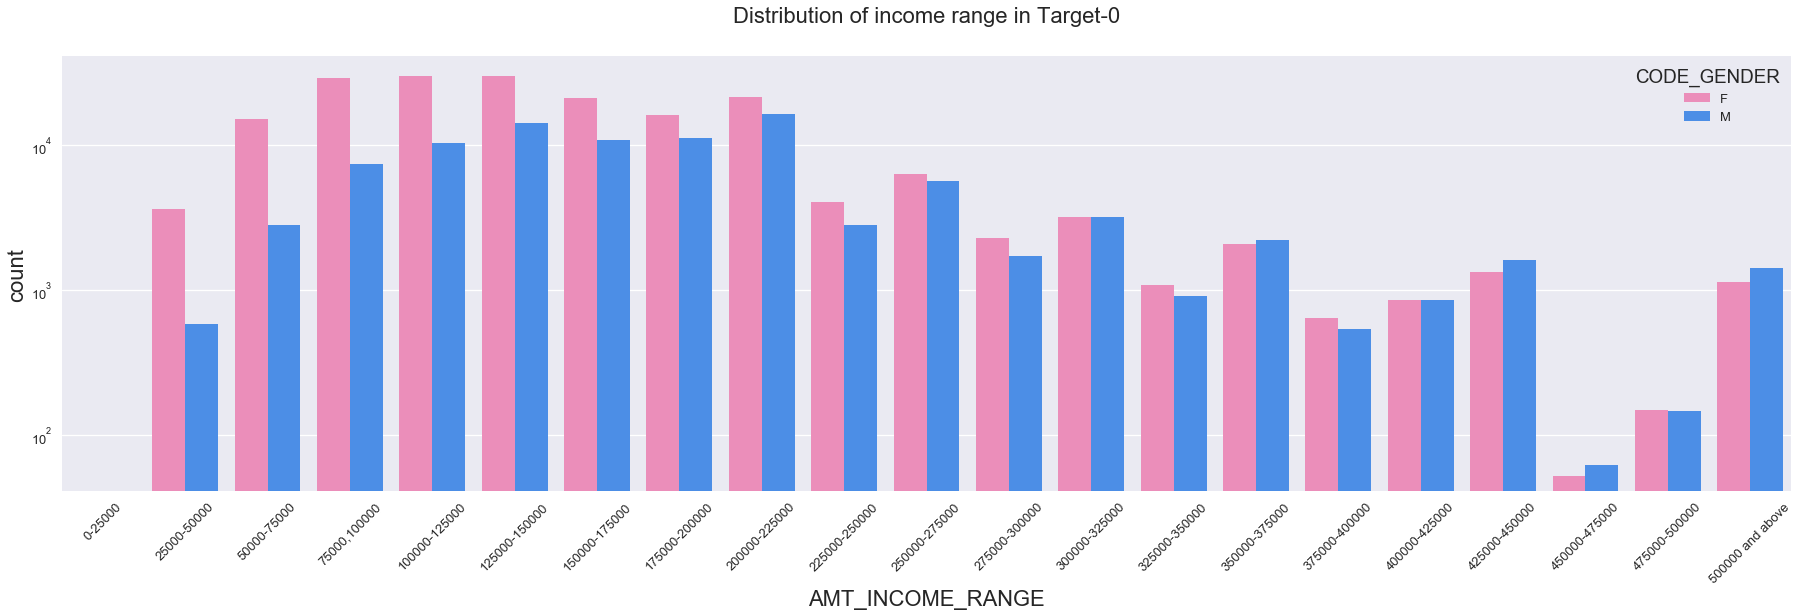

In [32]:
target0_df_0=target0_df[['AMT_INCOME_RANGE','CODE_GENDER']]
cpallate=["#338AFF","#FA7FB9"]
uniplot(target0_df_0,col='AMT_INCOME_RANGE',title='Distribution of income range in Target-0',hue='CODE_GENDER',hue_ord=["F","M"],c_pallate=["#FA7FB9","#338AFF"])

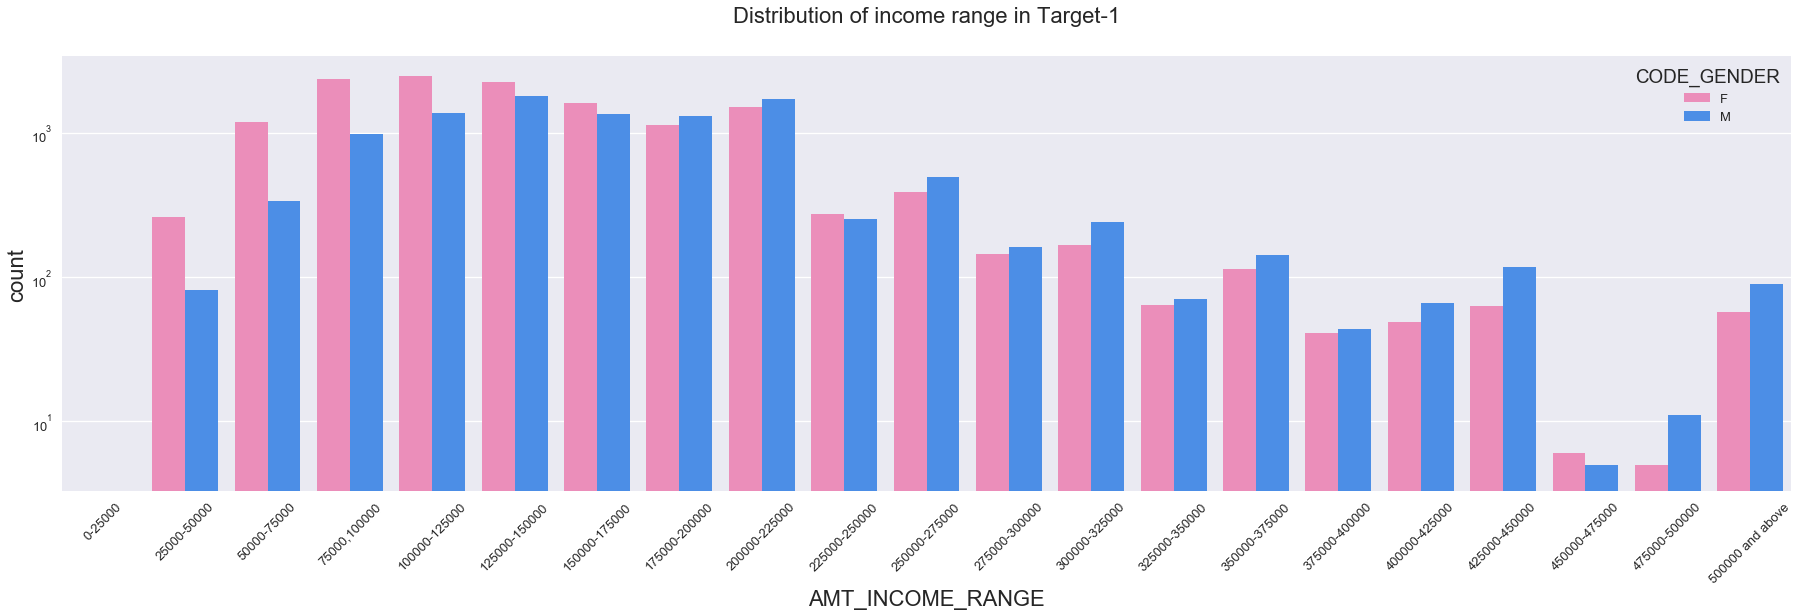

In [33]:
target1_df_0=target1_df[['AMT_INCOME_RANGE','CODE_GENDER']]
uniplot(target1_df_0,col='AMT_INCOME_RANGE',title='Distribution of income range in Target-1',hue='CODE_GENDER',hue_ord=["F","M"],c_pallate=["#FA7FB9","#338AFF"])

#### Observations:

  1. Females counts are higher than male in both Non-Defaulters and Defaulters.
  
  2. Gender dristribution somewhat similar in both Non-Defaulters and Defaulters
  
  3. Income range from 100000 to 200000 is having more number of credits.
  
  4. Very less count for income range 400000 and above 
  

##### Income Type

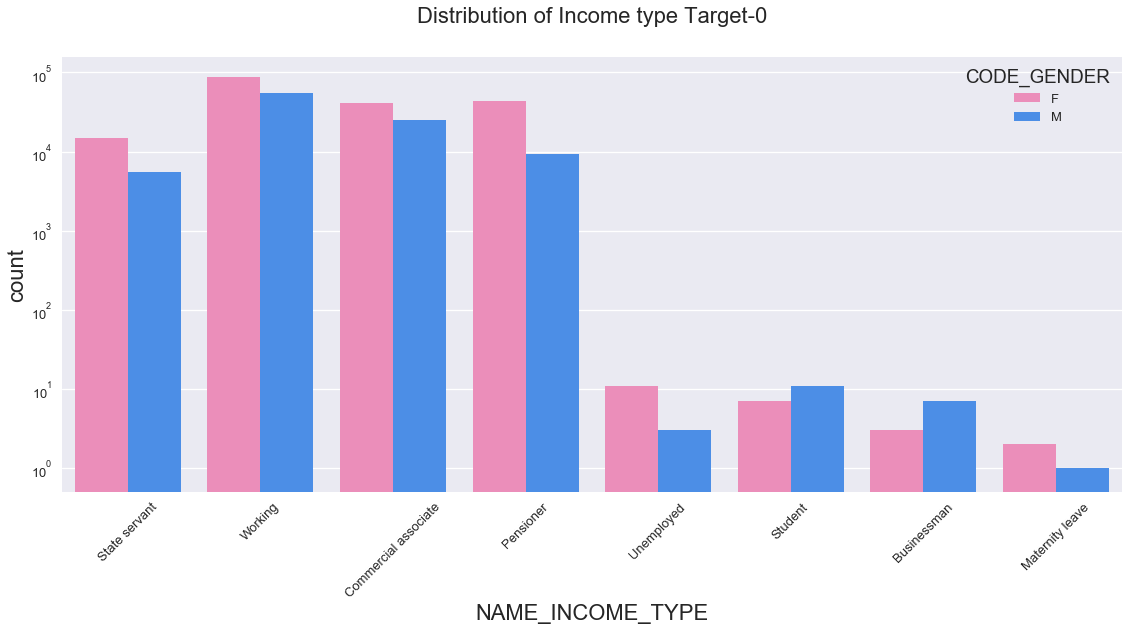

In [34]:
uniplot(target0_df,col='NAME_INCOME_TYPE',title='Distribution of Income type Target-0',hue='CODE_GENDER',hue_ord=["F","M"],c_pallate=["#FA7FB9","#338AFF"])

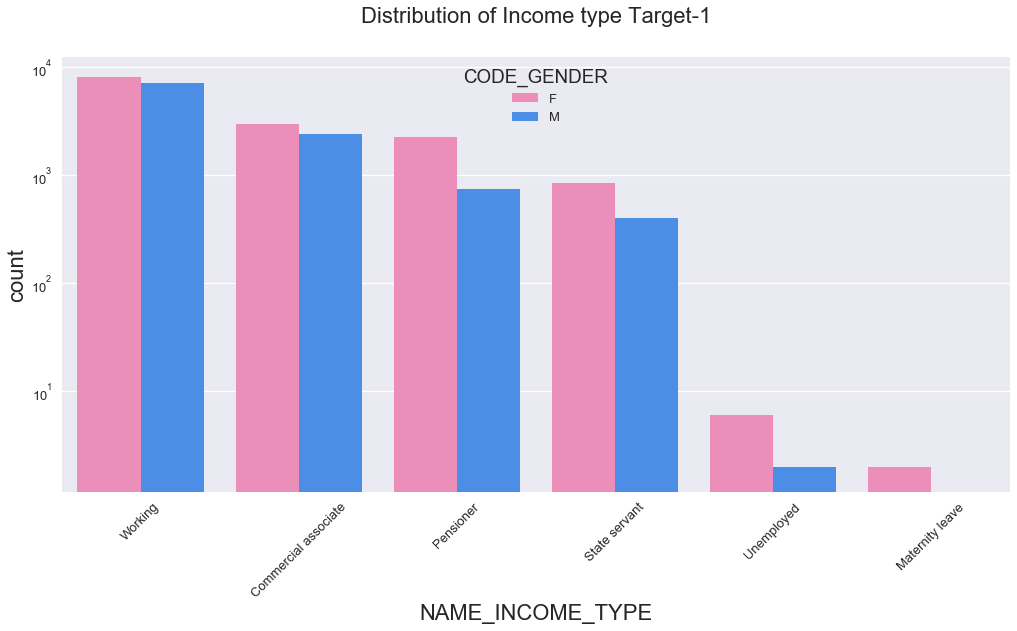

In [35]:
uniplot(target1_df,col='NAME_INCOME_TYPE',title='Distribution of Income type Target-1',hue='CODE_GENDER',hue_ord=["F","M"],c_pallate=["#FA7FB9","#338AFF"])

#### Observations:

1. Females are having more number of credits than male.
2. For income type 'Working', 'Commercial associate' and 'State servant' has considerably high credits.
3. All other category its too low.
4. It is interesting to note that there is no `Student` type  available in `Target - 1` 


##### Contract Type

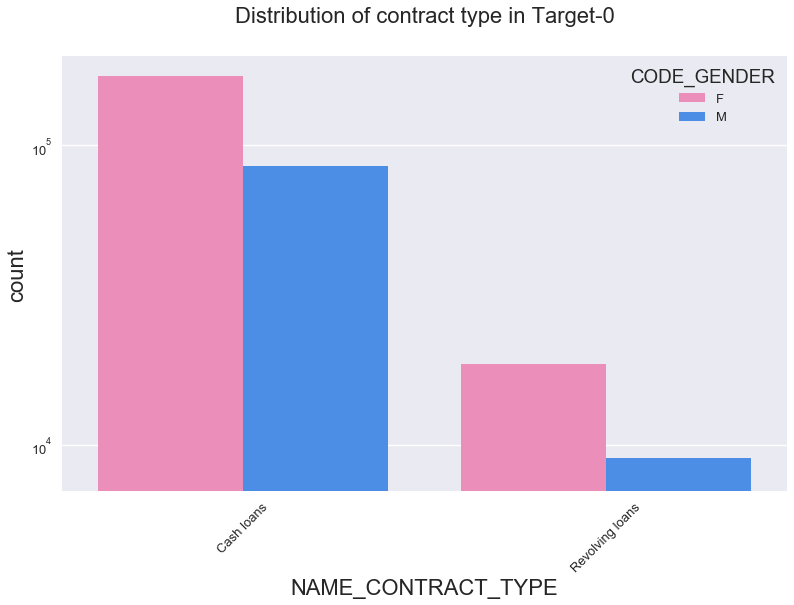

In [36]:
uniplot(target0_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type in Target-0',hue='CODE_GENDER',hue_ord=["F","M"],c_pallate=["#FA7FB9","#338AFF"])

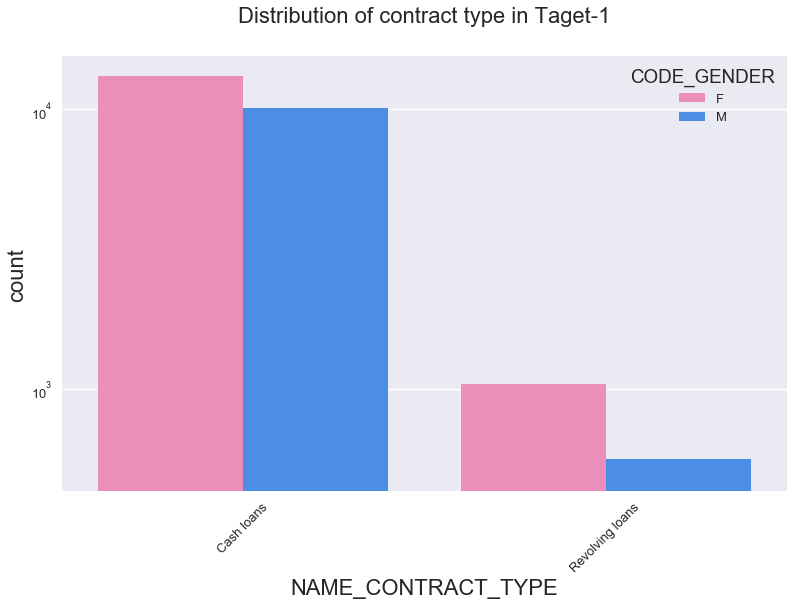

In [37]:
uniplot(target1_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type in Taget-1',hue='CODE_GENDER',hue_ord=["F","M"],c_pallate=["#FA7FB9","#338AFF"])

#### Observations:

1. Here also Females are leading.

2. `Cash loans` credits are higher than `Revolving loans`

### Organization type in logarithm scale( Here we are using logarithm scale to reduce to skewness of one or a few points are much larger than the bulk of the data )


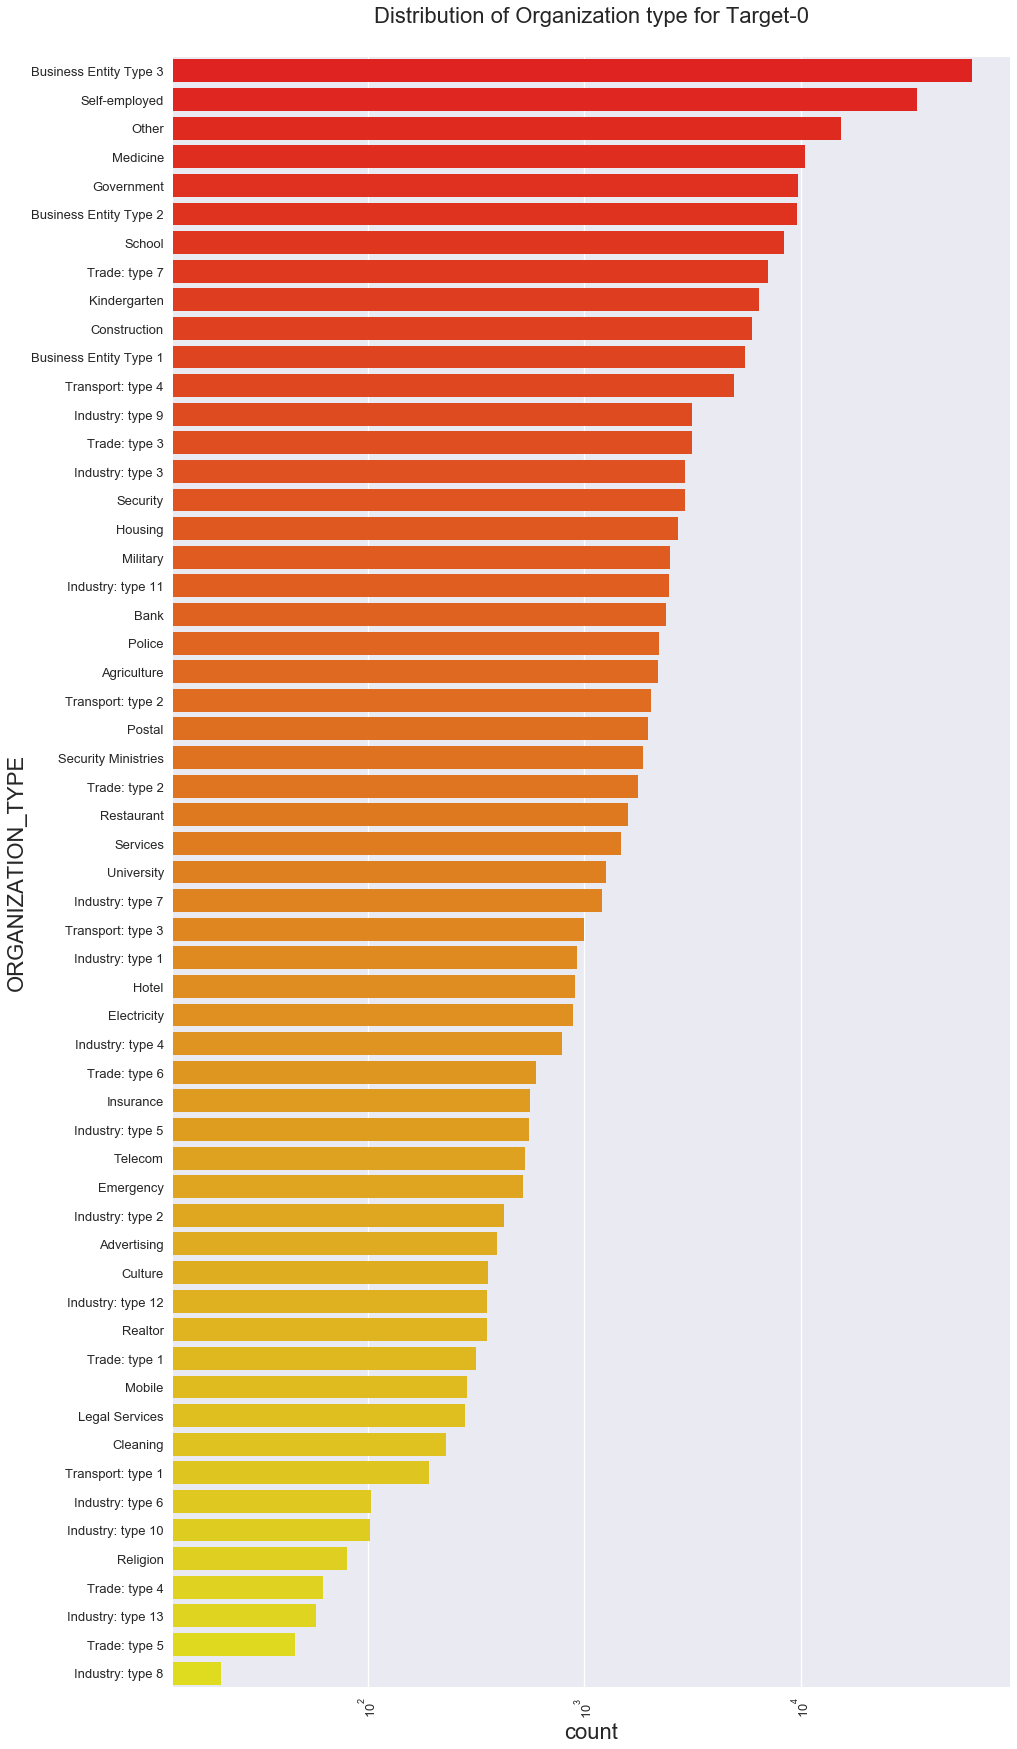

In [38]:
sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 22
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 34

plt.title("Distribution of Organization type for Target-0")

plt.xticks(rotation=90)
plt.xscale('log')
t0df=target0_df[~target0_df["ORGANIZATION_TYPE"].isin(["XNA"])]
sns.countplot(data=t0df,y='ORGANIZATION_TYPE',order=t0df['ORGANIZATION_TYPE'].value_counts().index,palette="autumn")

plt.show()

#### Observations:

1. Top 5 organization who had applied for credits are 'Business Entity Type 3', 'Self Employed','Other','Medicine' and 'Government'.
2. Less clients are from Industry type 8,type 13, religion and trade type 5, type 4.

#### Categoroical Univariate Analysis in logarithmic scale for target=1(client with payment difficulties)



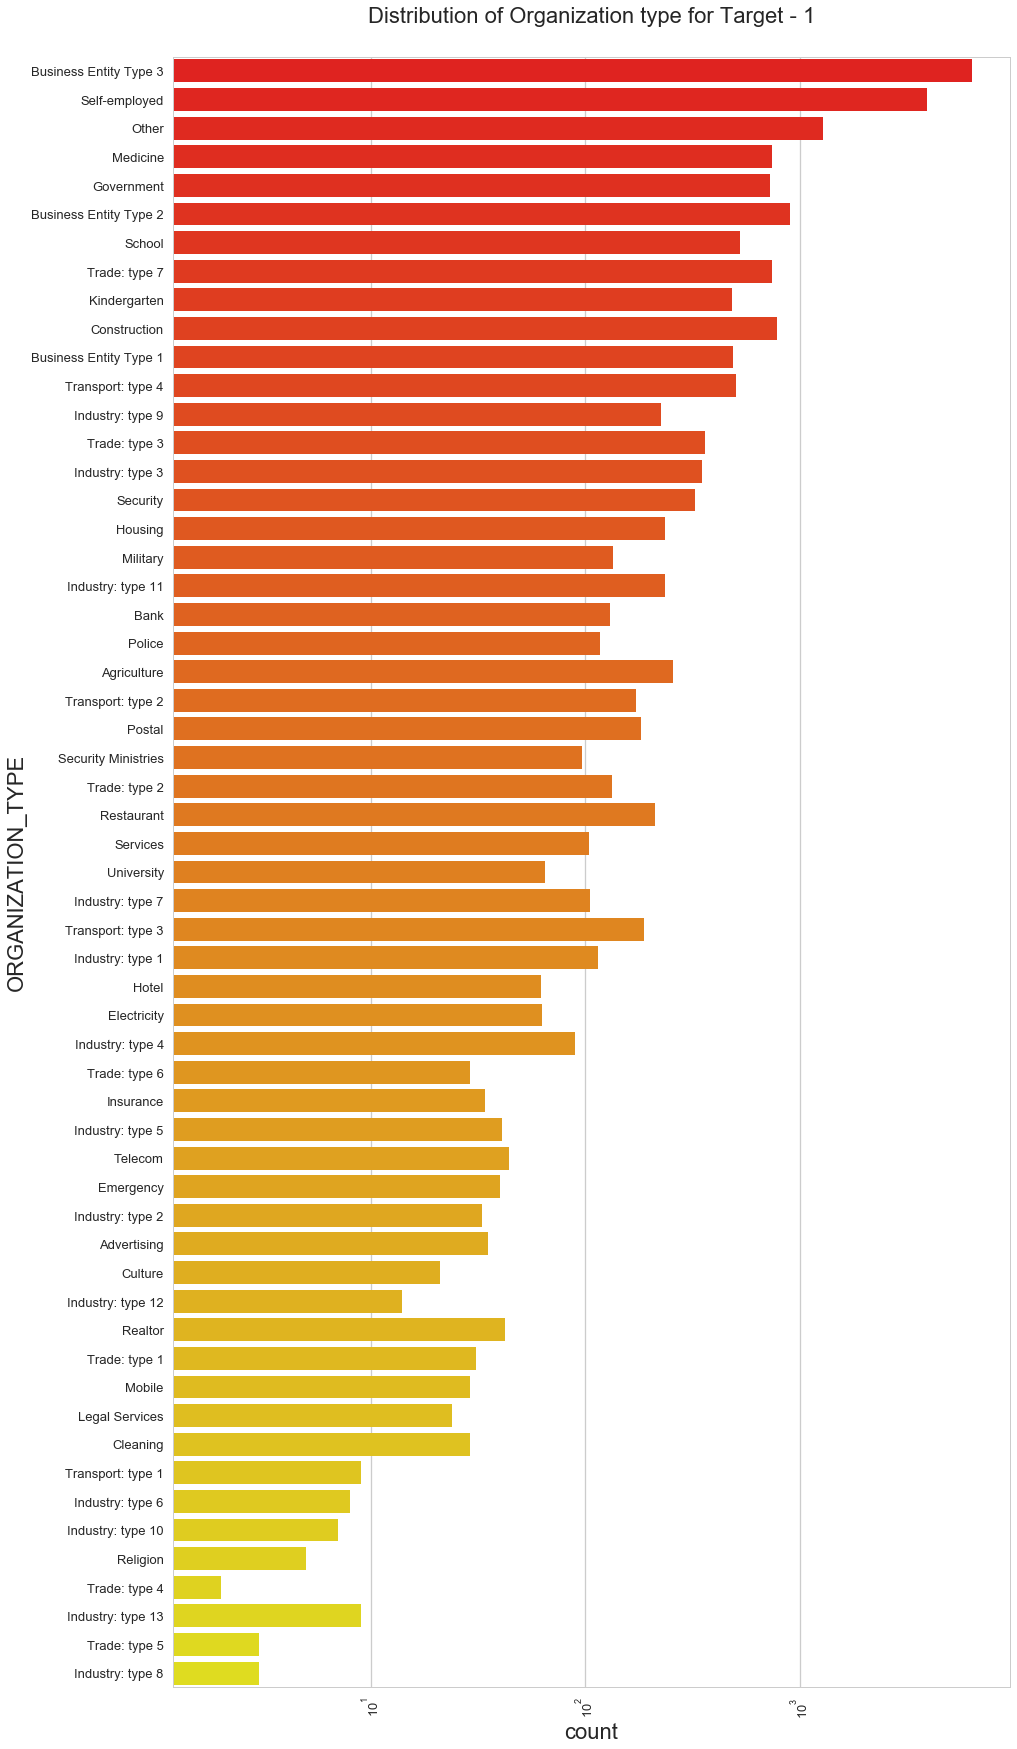

In [39]:
## Plotting for Organization Type
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 22
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 34

plt.title("Distribution of Organization type for Target - 1")

plt.xticks(rotation=90)
plt.xscale('log')
t1df=target1_df[~target1_df["ORGANIZATION_TYPE"].isin(["XNA"])]
sns.countplot(data=t1df,y='ORGANIZATION_TYPE',order=t0df['ORGANIZATION_TYPE'].value_counts().index,palette='autumn')

plt.show()

#### Observations:

1. Top 5 organization who had applied for credits are 'Business Entity Type 3', 'Self Employed','Other','Medicine' and 'Government'.
2. Less clients are from Industry type 8,type 6,type10, religion and trade type 5, type 4.

###### ----

### Correlation for Numerical Columns for both Target-0 and Target-1

#### ---

In [40]:
target0_corr=target0_df.iloc[0:,2:]
target1_corr=target1_df.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')


In [41]:
## Corelation for target 0

target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.038308,0.002315,0.024767,-0.001293,-0.025551,0.375639,-0.161230,0.180517,-0.019986,...,0.022537,-0.001278,0.022204,-0.001735,0.001279,0.000760,-0.001295,-0.001233,-0.007722,-0.044217
AMT_INCOME_TOTAL,0.038308,1.000000,0.416017,0.485689,0.419929,0.097772,0.093515,-0.174540,0.076387,0.035931,...,-0.028989,-0.032758,-0.028726,-0.033948,0.002692,0.006026,0.009407,0.073695,0.027426,0.061557
AMT_CREDIT,0.002315,0.416017,1.000000,0.831885,0.985510,0.053570,-0.057151,-0.120400,0.009416,-0.001982,...,0.003045,-0.015646,0.003122,-0.018724,-0.003655,0.000362,-0.004833,0.045454,0.024427,-0.035046
AMT_ANNUITY,0.024767,0.485689,0.831885,1.000000,0.830352,0.058591,0.011740,-0.129773,0.037717,0.016570,...,-0.009431,-0.018551,-0.009206,-0.020812,0.003495,0.002631,0.011850,0.050658,0.022428,0.001118
AMT_GOODS_PRICE,-0.001293,0.419929,0.985510,0.830352,1.000000,0.062650,-0.058256,-0.122231,0.009528,-0.004018,...,0.002433,-0.016732,0.002545,-0.019411,-0.002800,0.000607,-0.004285,0.046295,0.025164,-0.037155
REGION_POPULATION_RELATIVE,-0.025551,0.097772,0.053570,0.058591,0.062650,1.000000,-0.030730,-0.002577,-0.036684,-0.010463,...,0.011866,0.028527,0.012428,0.023837,-0.004555,-0.000730,-0.004799,0.048535,-0.001181,0.004876
DAYS_BIRTH,0.375639,0.093515,-0.057151,0.011740,-0.058256,-0.030730,1.000000,-0.234168,0.298130,0.261979,...,0.021762,0.000492,0.021388,0.002379,0.004558,0.002876,-0.001635,0.013089,-0.011576,-0.061824
DAYS_EMPLOYED,-0.161230,-0.174540,-0.120400,-0.129773,-0.122231,-0.002577,-0.234168,1.000000,-0.037302,-0.117617,...,-0.000143,0.018687,0.000004,0.016893,-0.005404,0.000665,0.000802,-0.042597,0.015134,0.012884
DAYS_REGISTRATION,0.180517,0.076387,0.009416,0.037717,0.009528,-0.036684,0.298130,-0.037302,1.000000,0.094153,...,0.013432,0.002416,0.013279,0.003582,-0.003547,-0.001472,-0.002519,-0.006138,-0.000074,-0.021553
DAYS_ID_PUBLISH,-0.019986,0.035931,-0.001982,0.016570,-0.004018,-0.010463,0.261979,-0.117617,0.094153,1.000000,...,-0.004114,0.002002,-0.004676,0.004642,0.004817,-0.000099,-0.002464,-0.007989,-0.010705,-0.032853


In [42]:
## Correlation for target 1
target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,-0.004749,0.000200,0.033679,-0.007572,-0.031628,0.267862,-0.116332,0.133658,-0.027320,...,0.032070,-0.003351,0.031274,-0.005607,0.000564,-0.011009,-0.004516,-0.013416,-0.015320,-0.036691
AMT_INCOME_TOTAL,-0.004749,1.000000,0.359276,0.431617,0.362780,0.051463,-0.007238,-0.117761,0.036671,-0.005929,...,0.000630,-0.019355,0.000674,-0.023345,0.010661,-0.002371,0.018841,0.079795,0.025086,0.081913
AMT_CREDIT,0.000200,0.359276,1.000000,0.811443,0.977224,0.039919,-0.155216,-0.083601,-0.017099,-0.053780,...,0.018355,-0.021987,0.018215,-0.029011,0.002944,-0.004877,0.002992,0.044705,-0.019015,-0.026472
AMT_ANNUITY,0.033679,0.431617,0.811443,1.000000,0.804931,0.023297,-0.030483,-0.096587,0.035900,-0.014472,...,0.007430,-0.020239,0.008253,-0.026831,0.014390,-0.004444,0.030202,0.065508,-0.003439,-0.005174
AMT_GOODS_PRICE,-0.007572,0.362780,0.977224,0.804931,1.000000,0.054140,-0.157778,-0.086194,-0.019172,-0.059736,...,0.020324,-0.019482,0.020205,-0.026197,0.006146,-0.005003,0.003662,0.048002,-0.015998,-0.026238
REGION_POPULATION_RELATIVE,-0.031628,0.051463,0.039919,0.023297,0.054140,1.000000,-0.046398,-0.003635,-0.034315,-0.023668,...,0.031010,0.048992,0.030717,0.039026,-0.005804,0.000816,-0.002187,0.049689,-0.014709,0.008659
DAYS_BIRTH,0.267862,-0.007238,-0.155216,-0.030483,-0.157778,-0.046398,1.000000,-0.107174,0.232940,0.251626,...,0.006410,0.011838,0.005937,0.013496,0.015904,0.001271,-0.003331,0.005324,-0.010736,-0.080880
DAYS_EMPLOYED,-0.116332,-0.117761,-0.083601,-0.096587,-0.086194,-0.003635,-0.107174,1.000000,-0.017716,-0.049799,...,-0.025394,0.007078,-0.025721,0.010226,0.003651,0.019698,0.011642,-0.029395,0.016947,-0.027963
DAYS_REGISTRATION,0.133658,0.036671,-0.017099,0.035900,-0.019172,-0.034315,0.232940,-0.017716,1.000000,0.095750,...,0.021190,0.010782,0.020920,0.008554,-0.001959,-0.003078,0.004176,0.013722,-0.007161,-0.010568
DAYS_ID_PUBLISH,-0.027320,-0.005929,-0.053780,-0.014472,-0.059736,-0.023668,0.251626,-0.049799,0.095750,1.000000,...,-0.013576,0.007839,-0.013002,0.006706,0.002735,-0.013353,0.003583,-0.009518,0.008408,-0.044789


#### Plotting Correlation with Heat Map 

In [43]:
def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice


    sns.heatmap(data, cmap="OrRd",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

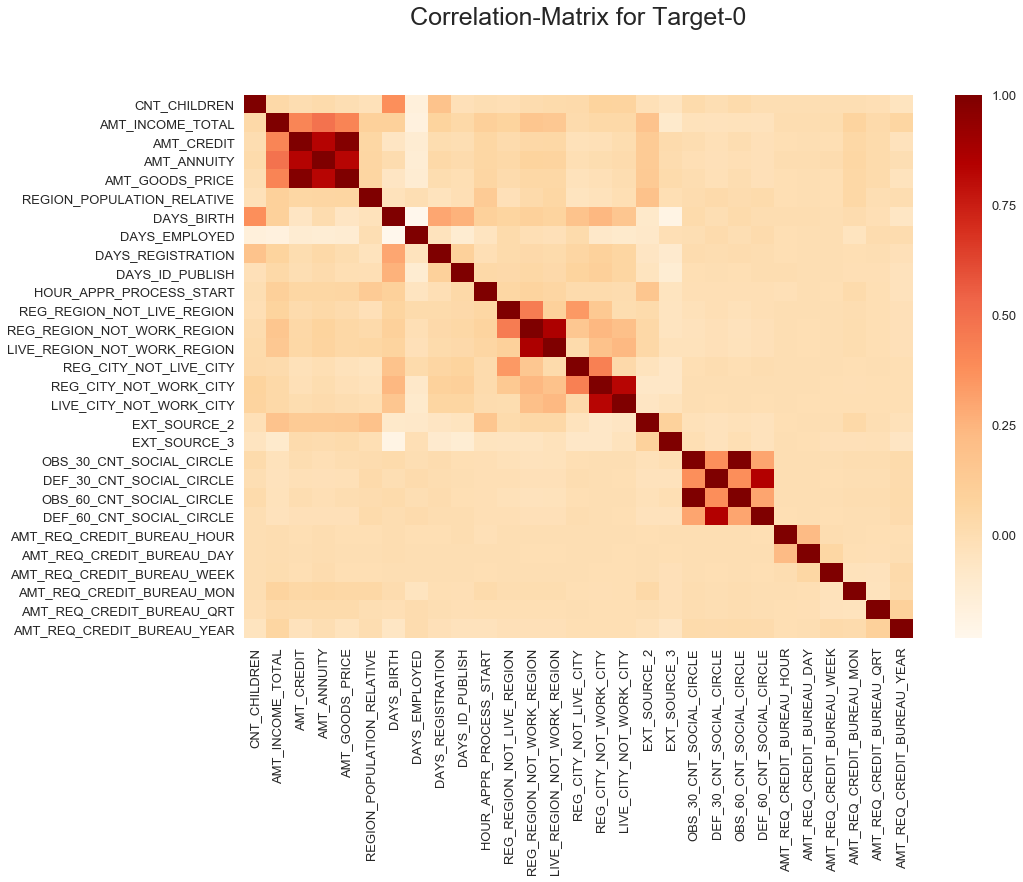

In [44]:
## Target 0 
targets_corr(data=target0,title='Correlation-Matrix for Target-0')

##### It is important to note that there is strong correlation between `AMT_INCOME_TOTAL`,`AMT_CREDIT`,`AMT_ANNUITY` & `AMT_GOODS_PRICE`
##### Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa
##### Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa
##### Less children client have in densely populated area
##### The income is also higher in densely populated area

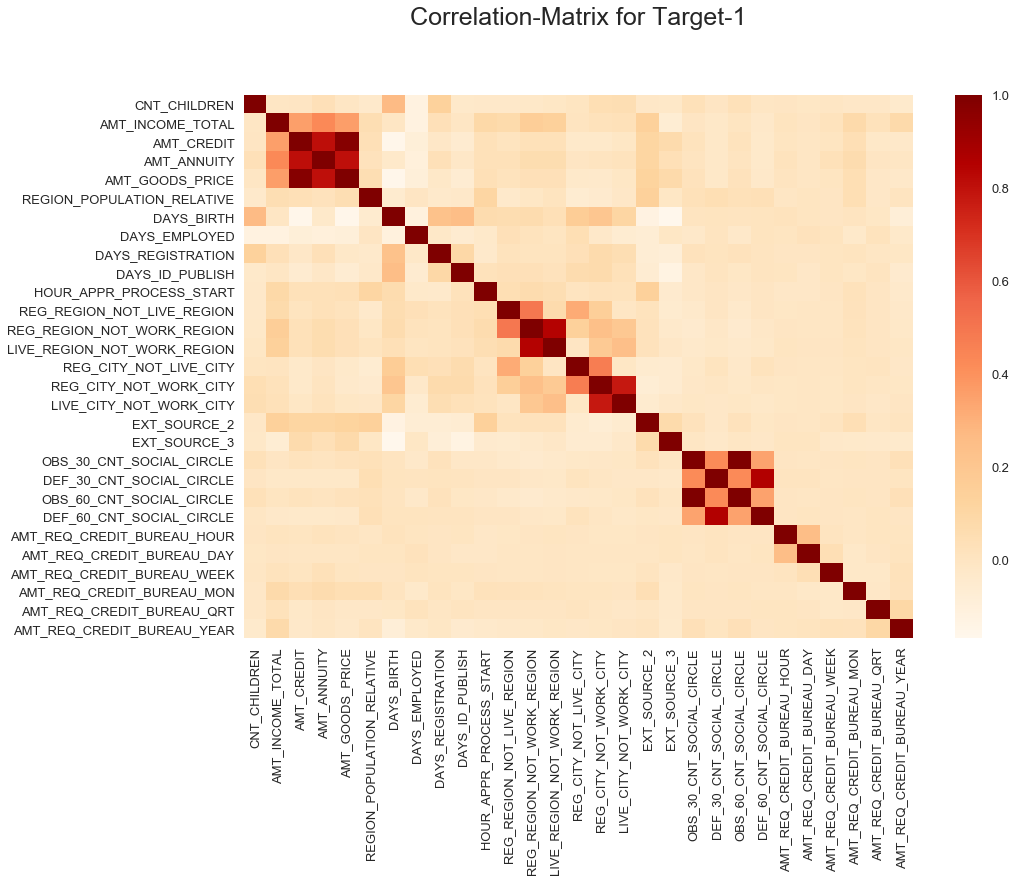

In [45]:
## Target 1
targets_corr(data=target1,title='Correlation-Matrix for Target-1')

##### It is import to note that there is strong correlation between `AMT_INCOME_TOTAL`,`AMT_CREDIT`,`AMT_ANNUITY` & `AMT_GOODS_PRICE`
##### Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa
##### Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa
##### Less children client have in densely populated area
##### The income is also higher in densely populated area

### Univariate Analysis 

#### Box Plotting --Univariate Analysis in logarithm scale

In [46]:
def univariate_numerical(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 22
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 34
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =target1_df, x=col,orient='v')
    plt.show()

Target 0 --Finding any Outliers

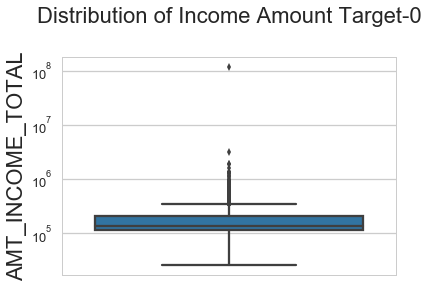

In [47]:
# Distribution of income amount

univariate_numerical(data=target0_df,col='AMT_INCOME_TOTAL',title='Distribution of Income Amount Target-0')

#### As we can see in the above graph, that 3rd Quartile is slim for Income Amount

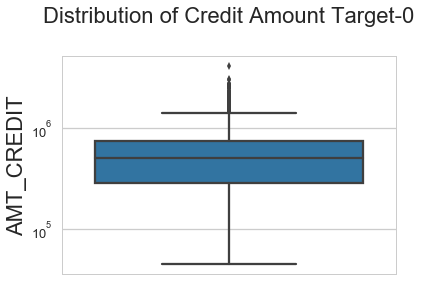

In [48]:

# Disrtibution of credit amount

univariate_numerical(data=target0_df,col='AMT_CREDIT',title='Distribution of Credit Amount Target-0')

#### The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

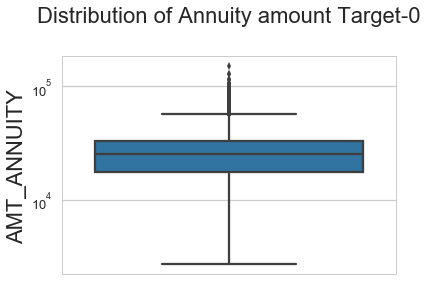

In [49]:
# Distribution for Annuity Amount
univariate_numerical(data=target0_df,col='AMT_ANNUITY',title='Distribution of Annuity amount Target-0')

Target 1 - Finding any Outliers

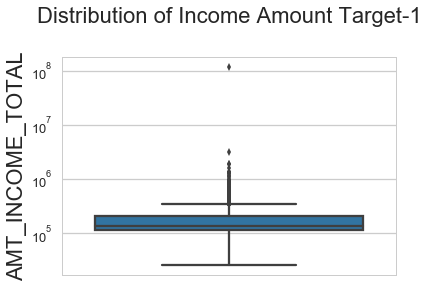

In [50]:
# Distribution of income amount

univariate_numerical(data=target1_df,col='AMT_INCOME_TOTAL',title='Distribution of Income Amount Target-1')

#### We can observe here that one outlier present

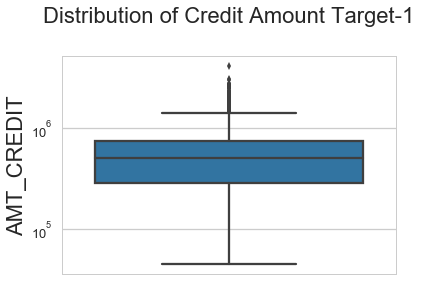

In [51]:
# Distribution of credit amount

univariate_numerical(data=target1_df,col='AMT_CREDIT',title='Distribution of Credit Amount Target-1')


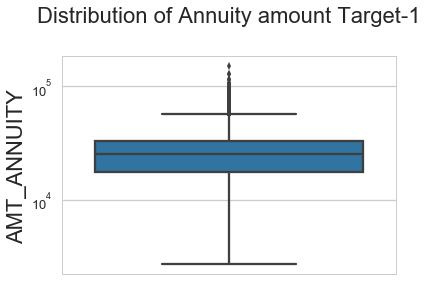

In [52]:
# Distribution of Annuity amount

univariate_numerical(data=target1_df,col='AMT_ANNUITY',title='Distribution of Annuity amount Target-1')

### Bivariate Analysis for Numerical Variables

## Target-0

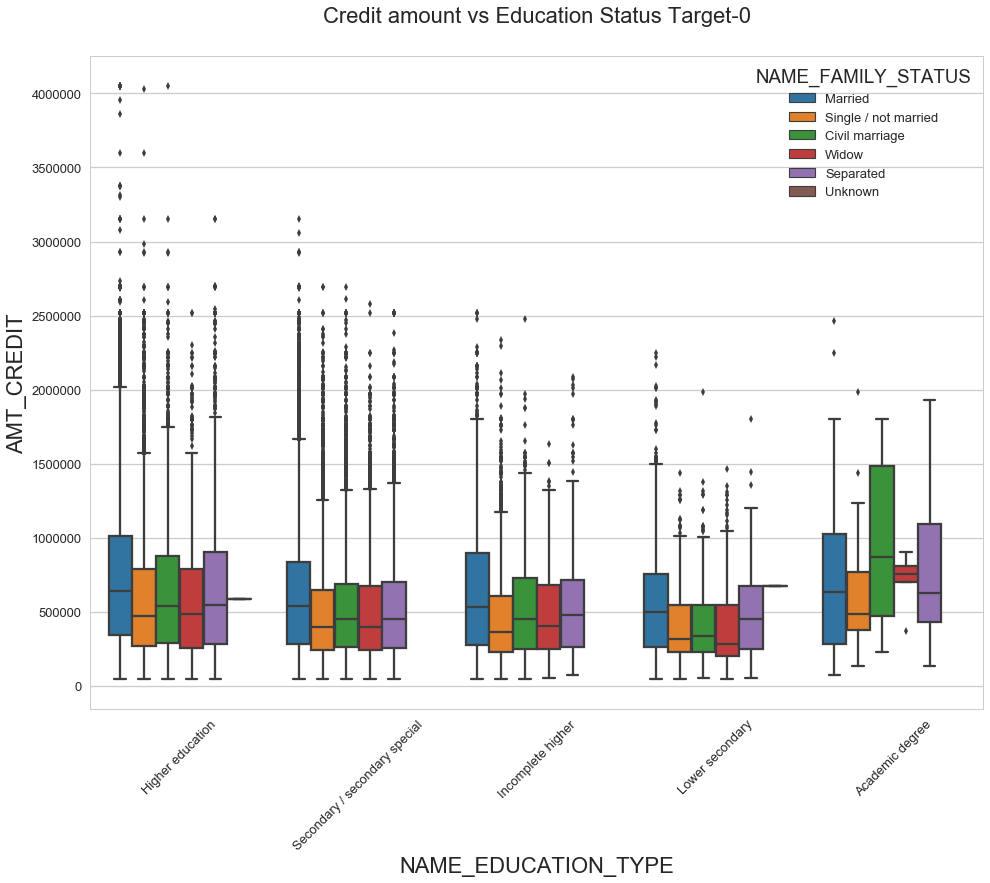

In [53]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status Target-0')
plt.show()

#### From the above box plot we can conclude that Family status of `civil marriage`, `marriage` and `separated` of Academic degree education is having higher number of credits than others. 
#### Also, `Higher Education` of family status of `marriage`, `single` and `civil marriage` are having more outliers.
#### `Civil Marriage` for `Academic Degree` is having most of the credits in the third quartile.

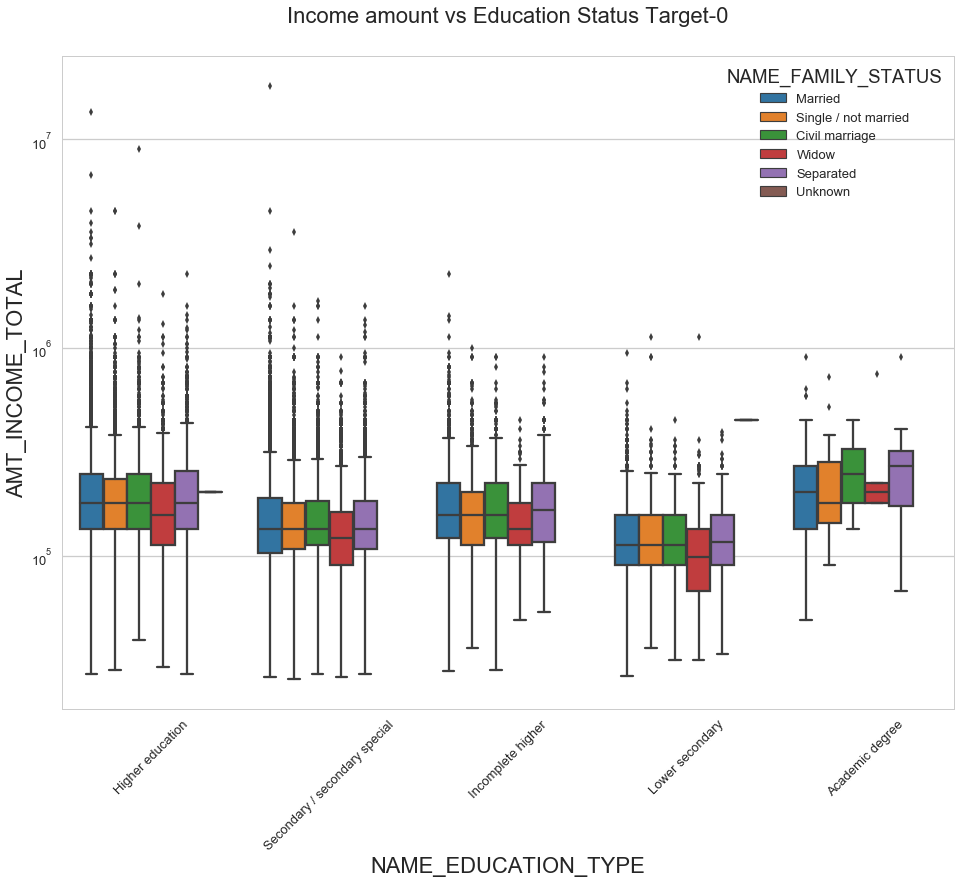

In [54]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status Target-0')
plt.show()

#### From above Education type `Higher Education`  contain many outliers. 
#### Less outlier are having for Academic degree but there income amount is little higher that Higher education.
#### Lower secondary of civil marriage family status are have less income amount than others.

## Target-1

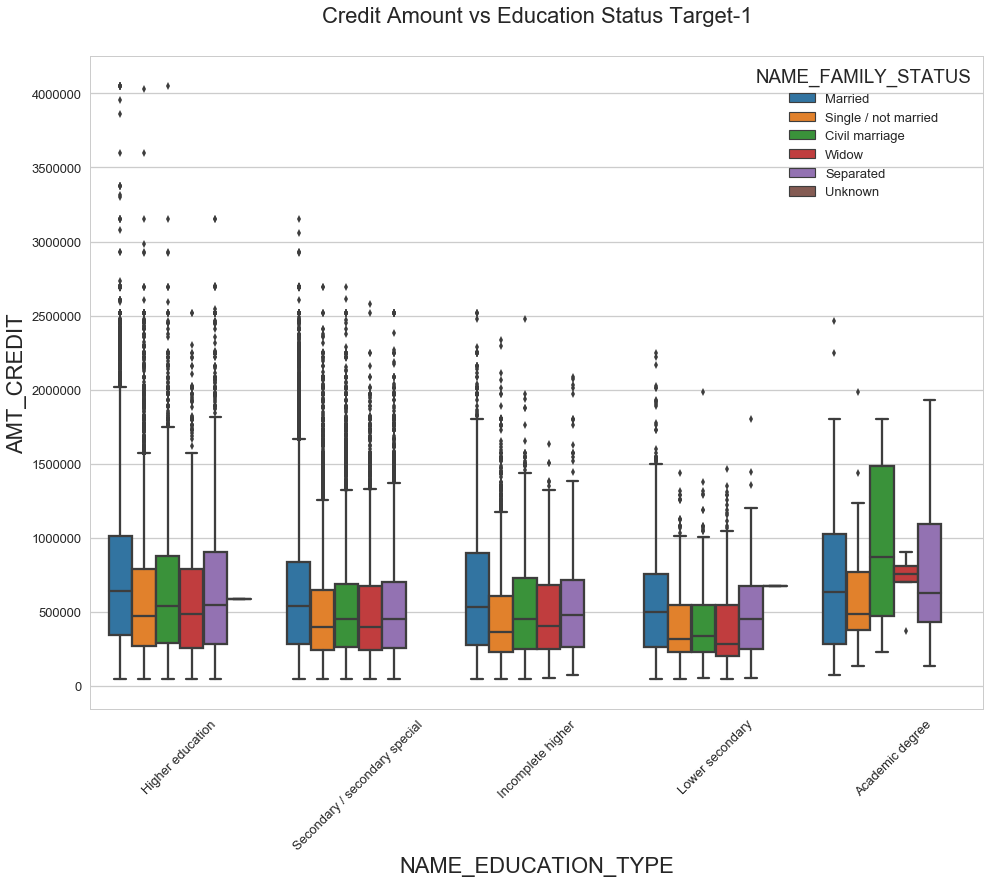

In [55]:
# Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status Target-1')
plt.show()

#### Quite similar with `Target 0`, we can observe that Family status of `Civil Marriage`, `Marriage` and `Separated` of `Academic Degree` education are having higher number of credits than others. 
#### Most of the outliers are from Education type `Higher education` and `Secondary`. 
#### `Civil Marriage` for Academic degree is having most of the credits in the third quartile.

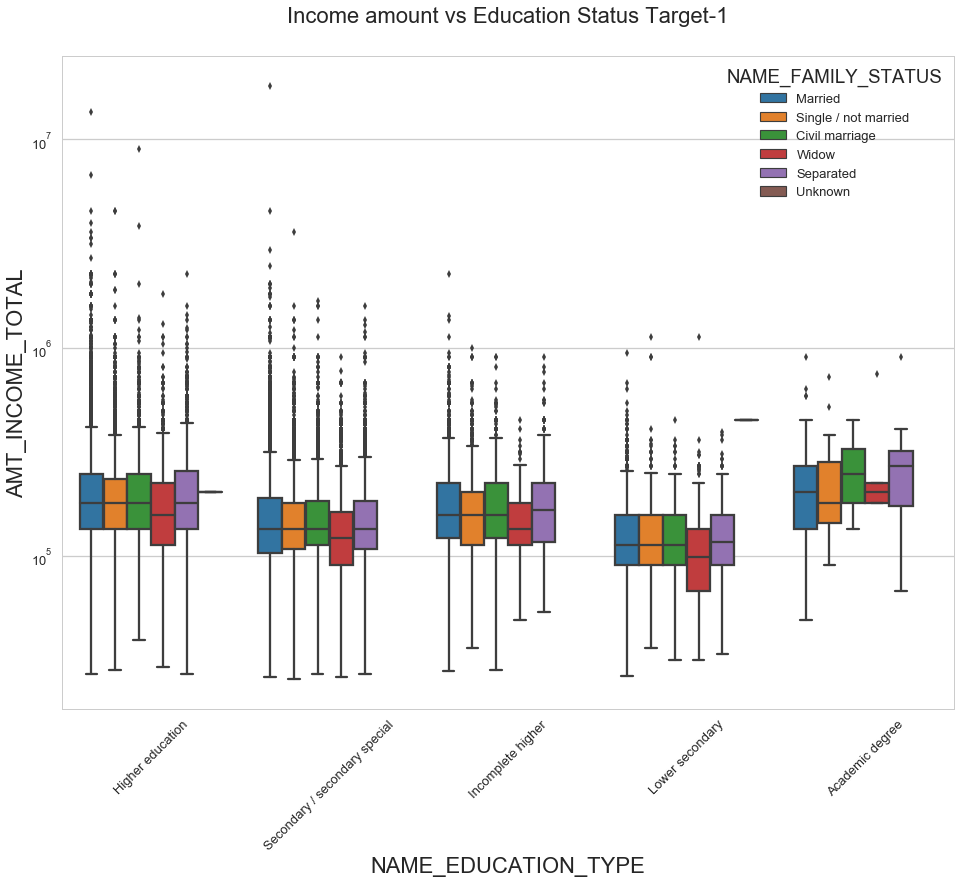

In [56]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status Target-1')
plt.show()


#### Have some similarity with `Target-0` one, from above boxplot, Education type `Higher education` the income amount is mostly equal with family status. 
#### Less outlier are seen for Academic degree but there income amount is little higher that Higher education.
#### Lower secondary have less income amount than others.

#### ------------------------------------------------------------

## Reading  Previous Application Dataset

#### ------------------------------------------------------------

In [57]:
df1 = pd.read_csv('previous_application.csv')

In [58]:
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df1.shape

(1670214, 37)

### Cleaning the Missing data and Listing the Null value columns having more than 30%

In [60]:
null_data1 = df1.isnull().sum()/len(df1)*100
null_data1.sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

In [61]:
rem_cols1 = null_data1[null_data1.values >(30)]

In [62]:
len(rem_cols1)

11

In [63]:
## Removing this 11 columns

columnames1 = list(rem_cols1.index)
df1.drop(labels = columnames1,axis =1,inplace=True) 

In [64]:
df1.shape

(1670214, 26)

In [65]:
df1.head(20)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,TUESDAY,11,Y,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,MONDAY,7,Y,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,MONDAY,15,Y,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,SATURDAY,15,Y,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash


#### Merging the  two Datasets -- i.e Application dataset and previous application dataset

In [66]:
merge_df=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')

In [67]:
## Renaming the column names 
merge_df1 = merge_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)


In [68]:
merge_df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [69]:
# Removing unwanted columns 

merge_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [70]:
merge_df1.shape

(1413701, 56)

#### Univariate Analysis

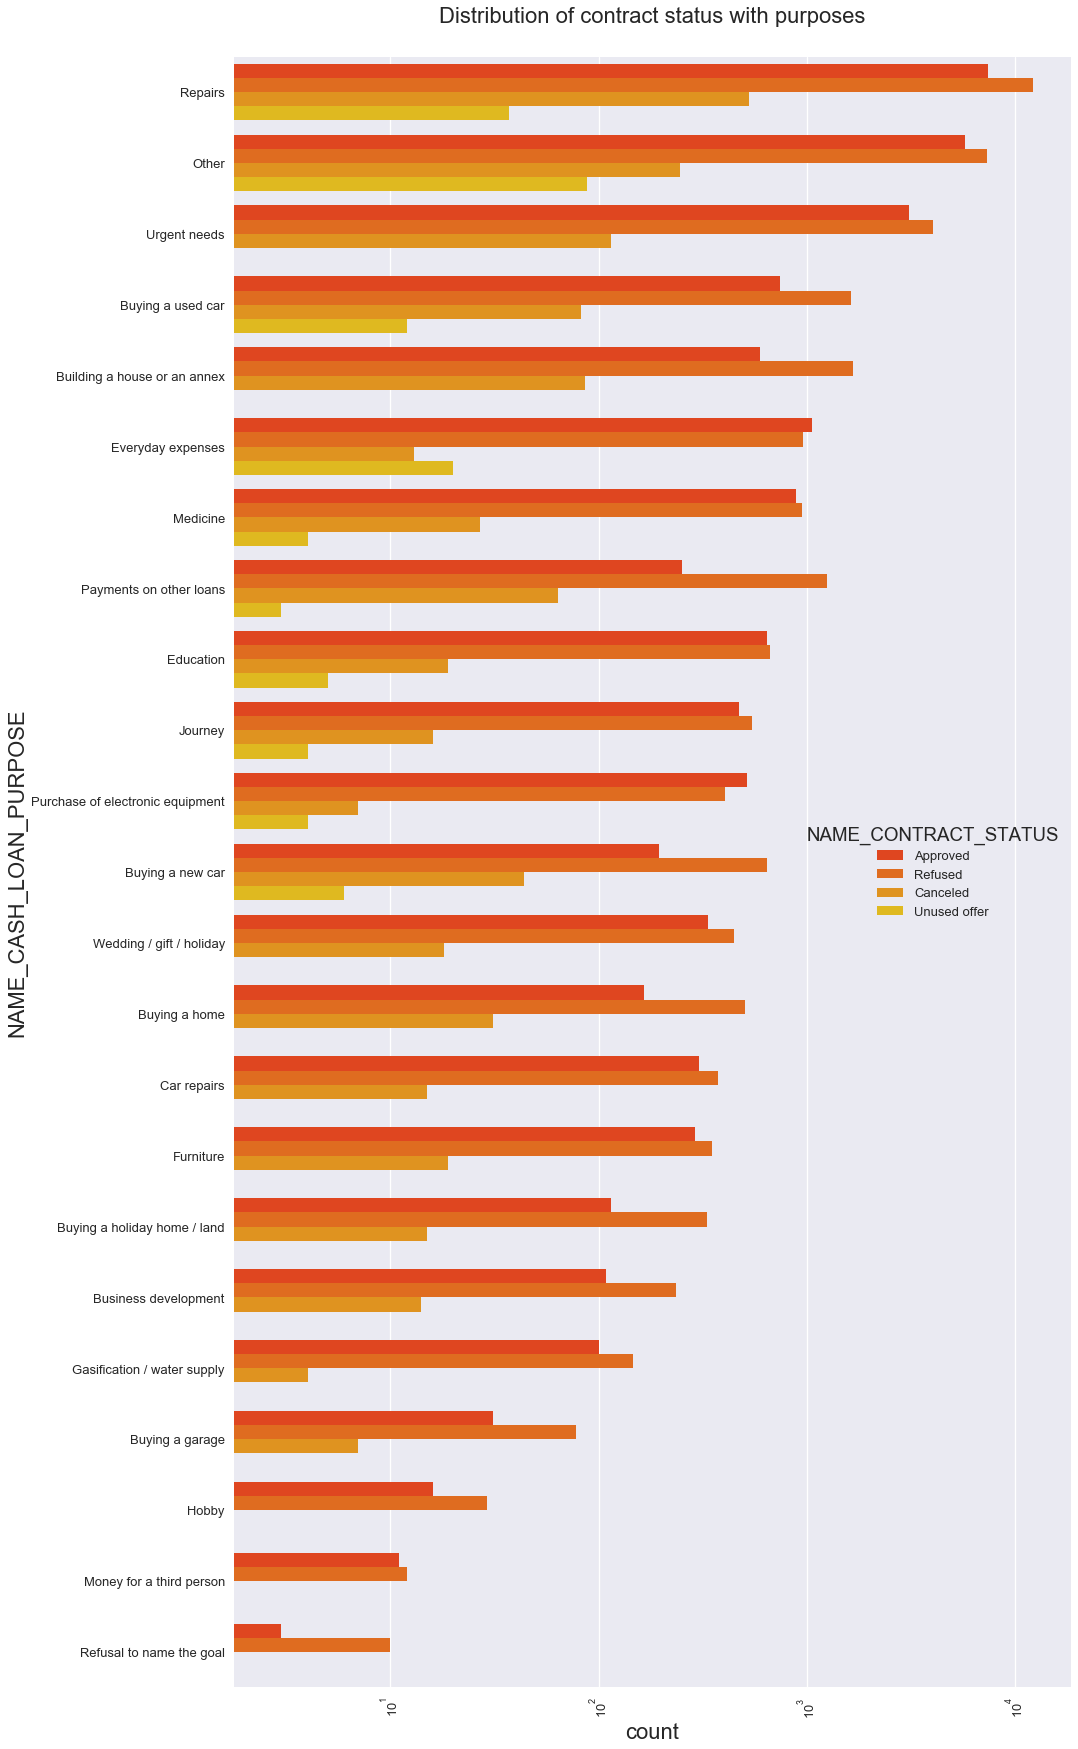

In [71]:
# Distribution of contract status in logarithmic scale

sns.set_style('darkgrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 22
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 34
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
d0=merge_df1[~merge_df1["NAME_CASH_LOAN_PURPOSE"].isin(["XAP","XNA"])]
ax = sns.countplot(data = d0, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=d0['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='autumn')

### Inferences from the plot

1. `Repairs` have `highest rejection` of loans while `Money for a third person` have least number rejections.
2. For `Education` there is equal number of Approval and Rejection of loans.
3. `Paying on other loans` and `Buying a new car` have significantly more refusals.
4. Overall refusal rate is more than acceptance.

** Note **


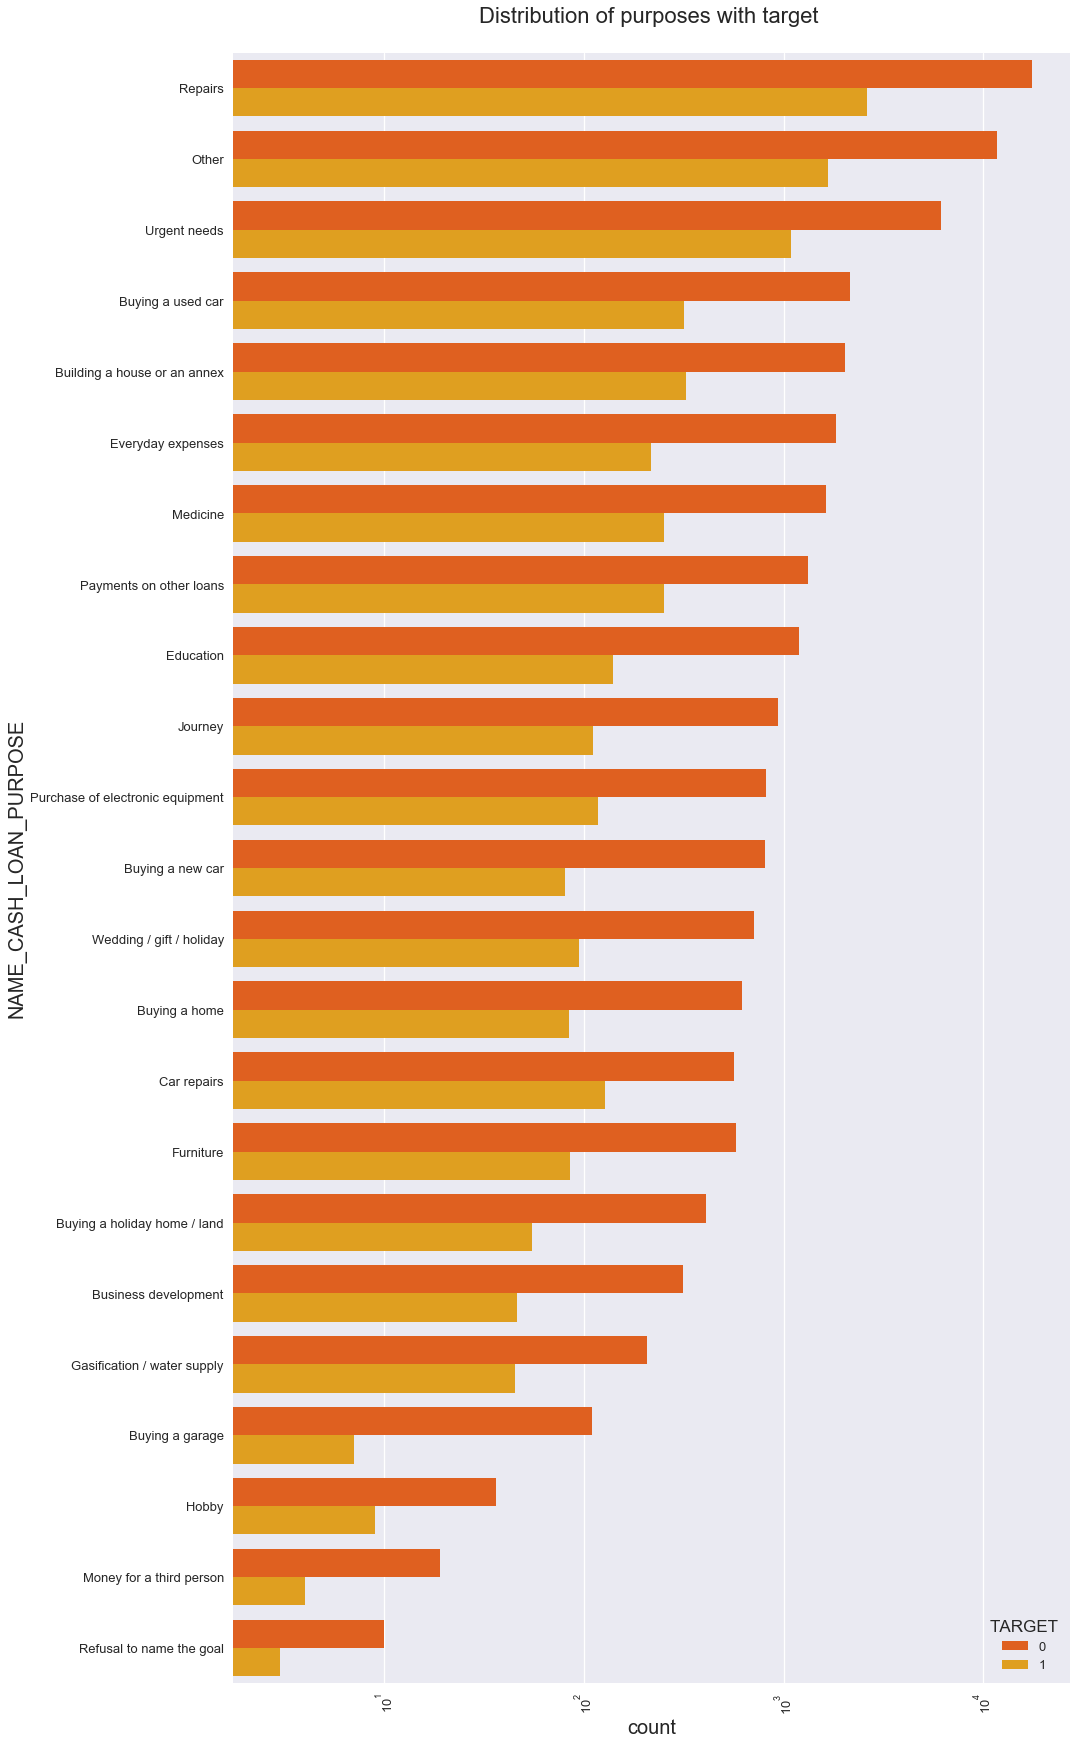

In [72]:

# Distribution of contract status

sns.set_style('darkgrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
d1=merge_df1[~merge_df1["NAME_CASH_LOAN_PURPOSE"].isin(["XAP","XNA"])]
ax = sns.countplot(data = d1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=d1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='autumn')

### Observations
1. `Repairs` are facing more difficulties for paying loan on time.
2. There are a few places where loan payment is significantly higher than facing difficulties. They are `Buying a garage`,    `Business development`, `Buying land`,`Buying a new car` and `Education`.
3. Hence, we can focus on these purposes for which the client is having minimal payment difficulties.


### Bivariate Analysis

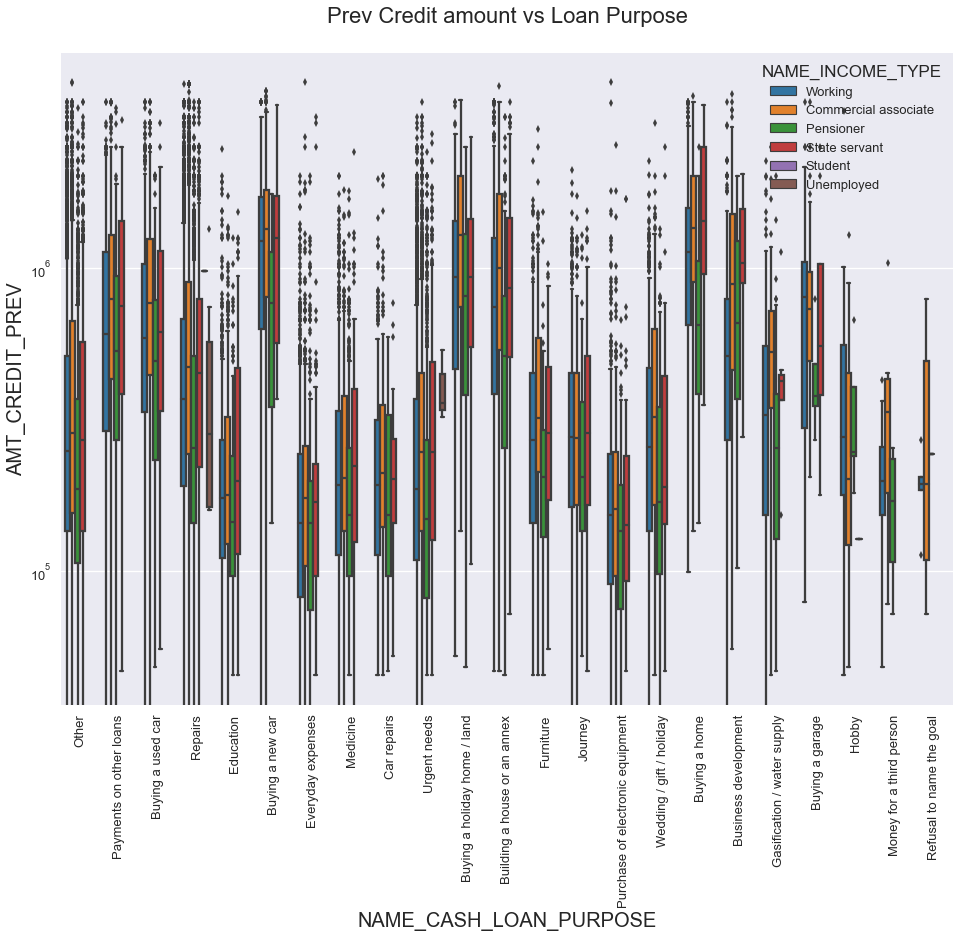

In [73]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =merge_df1[~merge_df1["NAME_CASH_LOAN_PURPOSE"].isin(["XAP","XNA"])], x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

### Observations
1. The credit amount of Loan purposes like `Buying a home`,`Buying a land`,`Buying a new car` and `Building a house` is higher.
2. Income type of State servants have a significant amount of credit applied.
3. Money for third person or a Hobby is having less credits applied.

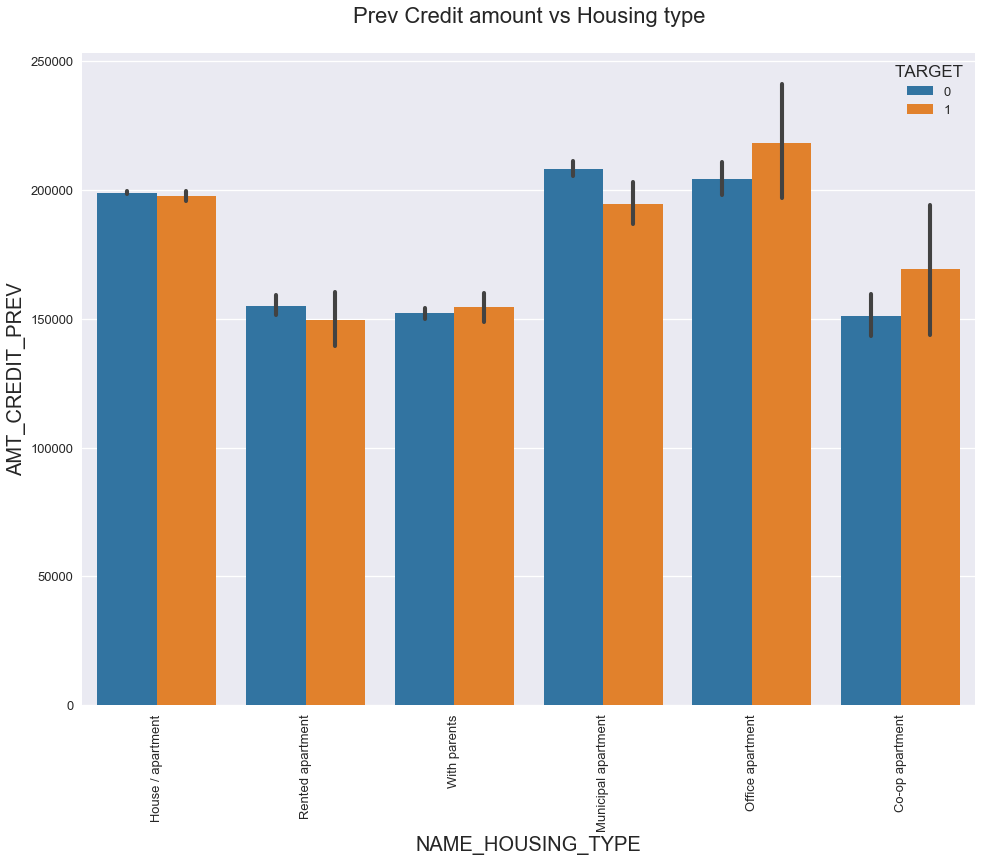

In [74]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =merge_df1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

### Observations:

1. Here for Housing type, office apartment is having higher credit of target 0, and co-op apartment is having higher credit of target 1. So, we can conclude that banks should avoid giving loans to the housing type of co-op apartments as they are having difficulties in payment.
2. Bank can focus mostly on housing type with parents or House\appartment or municipal apartment for successful payments.  

<hr style="border-top: 1px dotted red;"></hr>

## EDA Case Study - CONCLUSION

<hr style="border-top: 1px dotted red;"></hr>

##### 1. Banks should focus more on contract type `Student` ,`pensioner` and `Businessman` with housing type other than `Co-op apartment` for successful payments.

##### 2. Banks should focus less on income type `Working` as they are having most number of unsuccessful payments.

##### 3. Also with loan purpose `Repair` is having higher number of unsuccessful payments on time.

##### 4. Get as much as clients from housing type `With parents` as they are having least number of unsuccessful payments.